In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, brier_score_loss
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import dtreeviz

from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")

In [67]:
def calculate_stats(results_test, results_pred, name, display_labels):
    cm = confusion_matrix(results_test, results_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix ({name})')
    plt.show()

    print(f"\n{name}")
    if len(display_labels) > 2:
        accuracy = accuracy_score(results_test, results_pred)
        precision = precision_score(results_test, results_pred, average='weighted')
        recall = recall_score(results_test, results_pred, average='weighted')
        f1 = f1_score(results_test, results_pred, average='weighted')
    else:
        accuracy = accuracy_score(results_test, results_pred)
        precision = precision_score(results_test, results_pred)
        recall = recall_score(results_test, results_pred)
        f1 = f1_score(results_test, results_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1)

In [68]:
def logistic_regression(display_labels):
    logistic_r = LogisticRegression()
    logistic_r.fit(X_train, y_train)
    y_pred = logistic_r.predict(X_test)

    calculate_stats(y_test, y_pred, "Logistic Regression", display_labels)

    return logistic_r

In [69]:
def gradient_boosted_tree(display_labels):
    gbt = GradientBoostingClassifier(learning_rate=0.1, max_depth=6, min_samples_split=10000, n_estimators=10, max_features=None)
    gbt.fit(X_train, y_train)
    y_pred = gbt.predict(X_test)

    calculate_stats(y_test, y_pred, "Gradient Boosted Tree", display_labels)

    return gbt.predict_proba(X_test)

In [70]:
# SC/ST classifier with Odisha name record dataset
data = pd.read_csv("D:\\assorted\\Dropbox\\BDO_Data_Odisha\\SECC\\odisha_clean_2.csv", index_col=0)
data

,V1,state,district,tehsil,panchayat,language,auto_inclusion_deprivation_or_exclusion_or_other,head_of_hh,gender,age,...,fathers_and_mothers_name,deprivation_count,auto_inclusion_deprivation_code,total_members,hh_summary_auto_inclusion,hh_summary_auto_exclusion,hh_summary_auto_other,hh_summary_deprivation,village,keep
1,4241,ODISHA,Ganjam,PURUSOTTAMPUR,ACHULI(GP),eng,Auto Inclusion or Deprivation,BHIKA BHEHERA\ଭିକା ବେହେରା,M,69,...,ସୋମବାରିକ ବେହେରା\ସାଧବ ବେହେରା,2,"--,--,--,--,D5,--,D7",3,NaN,240,104.0,709.0,Anchuli,1
2,4242,ODISHA,Ganjam,PURUSOTTAMPUR,ACHULI(GP),eng,Auto Inclusion or Deprivation,ABHIMANYU BEHERA\ଅଭିମନ୍ୟୁ ବେହେରା,M,50,...,ନଟବର ବେହେରା\ମାହାଲି ବେହେରା,2,"--,--,--,--,D5,--,D7",7,NaN,240,104.0,709.0,Anchuli,1
3,4243,ODISHA,Ganjam,PURUSOTTAMPUR,ACHULI(GP),eng,Auto Inclusion or Deprivation,ABHIMANYU BEHERA\ଅଭିମନ୍ୟୁ ବେହେରା,M,52,...,ଚୌଧୁରୀ ବେହେରା\ମନ୍ଦ ବେହେରା,2,"--,--,--,--,D5,--,D7",3,NaN,240,104.0,709.0,Anchuli,1
4,4244,ODISHA,Ganjam,PURUSOTTAMPUR,ACHULI(GP),eng,Auto Inclusion or Deprivation,ABHIMANYU PANDA\ଅଭିମନ୍ୟୁ ପଣ୍ଡା,M,57,...,ଭଗବାନ ପଣ୍ଡା\ପଦ୍ମା ପଣ୍ଡା,1,"--,--,--,--,--,--,D7",5,NaN,240,104.0,709.0,Anchuli,1
5,4245,ODISHA,Ganjam,PURUSOTTAMPUR,ACHULI(GP),eng,Auto Inclusion or Deprivation,AIBANA BEHERA\ଅଇବନ ବେହେରା,M,40,...,କୋବି ବେହେରା \ରଙ୍ଗବତି ବେହେରା,2,"--,--,--,--,D5,--,D7",6,NaN,240,104.0,709.0,Anchuli,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918426,5767638,ODISHA,Kendujhar,Kendujhar Town,Sirispal(Village),eng,Others,TRILOCHAN GIRI\ତ୍ରିଲୋଚନ ଗିରି,M,36,...,ଆଦିତ୍ୟ ଗିରି\ବୈଦେହୀ ଗିରି,0,"--,--,--,--,--",4,10.0,49,103.0,268.0,Sirispal,1
1918427,5767639,ODISHA,Kendujhar,Kendujhar Town,Sirispal(Village),eng,Others,TRINATH GIRI\ତ୍ରିନାଥ ଗିରି,M,24,...,ବୀରବର ଗିରି\ଅଗନ୍ତୀ ଗିରି,0,"--,--,--,--,--",4,10.0,49,103.0,268.0,Sirispal,1
1918428,5767640,ODISHA,Kendujhar,Kendujhar Town,Sirispal(Village),eng,Others,TUPHAN GIRI\ତୁଫାନ ଗିରି,M,30,...,ବଂଶୀଧର ଗିରି\ସରସ୍ବତୀ ଗିରି,0,"--,--,--,--,--",4,10.0,49,103.0,268.0,Sirispal,1
1918429,5767641,ODISHA,Kendujhar,Kendujhar Town,Sirispal(Village),eng,Others,UMESH CHANDRA GIRI\ଉମେଶ ଚନ୍ଦ୍ର ଗିରି,M,58,...,ପଦନ ଗିରି\ଶିଶୁବତୀ ଗିରି,0,"--,--,--,--,--",3,10.0,49,103.0,268.0,Sirispal,1


In [71]:
df = data[["state", "district", "tehsil", "panchayat", "language", "head_of_hh", "gender", "age", "social_cat", "deprivation_count", "total_members", "village"]]
df

,state,district,tehsil,panchayat,language,head_of_hh,gender,age,social_cat,deprivation_count,total_members,village
1,ODISHA,Ganjam,PURUSOTTAMPUR,ACHULI(GP),eng,BHIKA BHEHERA\ଭିକା ବେହେରା,M,69,SC,2,3,Anchuli
2,ODISHA,Ganjam,PURUSOTTAMPUR,ACHULI(GP),eng,ABHIMANYU BEHERA\ଅଭିମନ୍ୟୁ ବେହେରା,M,50,SC,2,7,Anchuli
3,ODISHA,Ganjam,PURUSOTTAMPUR,ACHULI(GP),eng,ABHIMANYU BEHERA\ଅଭିମନ୍ୟୁ ବେହେରା,M,52,SC,2,3,Anchuli
4,ODISHA,Ganjam,PURUSOTTAMPUR,ACHULI(GP),eng,ABHIMANYU PANDA\ଅଭିମନ୍ୟୁ ପଣ୍ଡା,M,57,Other,1,5,Anchuli
5,ODISHA,Ganjam,PURUSOTTAMPUR,ACHULI(GP),eng,AIBANA BEHERA\ଅଇବନ ବେହେରା,M,40,SC,2,6,Anchuli
...,...,...,...,...,...,...,...,...,...,...,...,...
1918426,ODISHA,Kendujhar,Kendujhar Town,Sirispal(Village),eng,TRILOCHAN GIRI\ତ୍ରିଲୋଚନ ଗିରି,M,36,Other,0,4,Sirispal
1918427,ODISHA,Kendujhar,Kendujhar Town,Sirispal(Village),eng,TRINATH GIRI\ତ୍ରିନାଥ ଗିରି,M,24,Other,0,4,Sirispal
1918428,ODISHA,Kendujhar,Kendujhar Town,Sirispal(Village),eng,TUPHAN GIRI\ତୁଫାନ ଗିରି,M,30,Other,0,4,Sirispal
1918429,ODISHA,Kendujhar,Kendujhar Town,Sirispal(Village),eng,UMESH CHANDRA GIRI\ଉମେଶ ଚନ୍ଦ୍ର ଗିରି,M,58,Other,0,3,Sirispal


In [72]:
df["social_cat"].value_counts()

social_cat
Other    1151286
SC        392564
ST        374580
Name: count, dtype: int64

In [73]:
df = df.dropna()
y = df['social_cat']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['head_of_hh'])

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

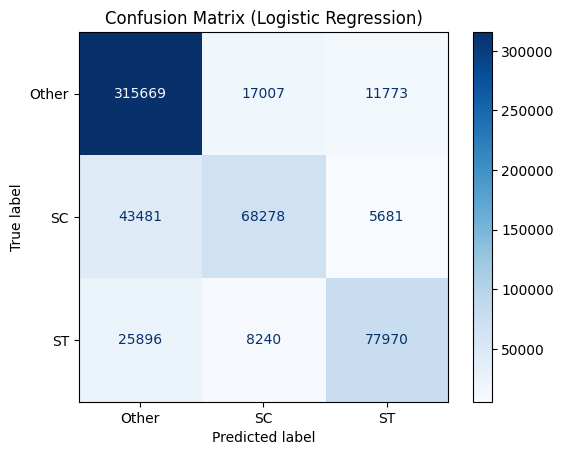


Logistic Regression
Accuracy: 0.8047404594116674
Precision: 0.8009208548766036
Recall: 0.8047404594116674
F1: 0.7985387707998919


In [75]:
prediction = logistic_regression(display_labels=["Other", "SC", "ST"])

In [76]:
# Data to predict for
to_predict = pd.read_csv("D:\\assorted\\Dropbox\\BDO_Data_Odisha\\SECC\\sampled_data.csv", index_col=0).drop("unnamed..0", axis=1).drop("Unnamed..0.1", axis=1)
to_predict

,district,block,gp,rc_name,form.no,full.name,spouse.name..,father.name,gen,relation,...,apl_dlr.2,grains.in.qtl.._dlr,koil.in.ltr.._dlr,block.hq_dlr,yes.no_dlr,district_id_dlr,district_name_dlr,block_name_dlr,spouse.name,entitlment..food.option.
1,cuttack,narsinghpur,balisahi,"0709051-GP Office, BALISAHI",1216,DEPIKA PATRA,NaN,BHASHKARA DAS,F,Daughter In Law,...,247.0,234.92,2393.0,11.0,Yes,7.0,CUTTACK,NARSINGHPUR,ALOK PATRA,NaN
2,cuttack,athgarh,khuntuni,"0701181-GP Office, KHUNTUNI",324,LOKANATH DALEI,NaN,TRILOCHAN DALEI,M,Son,...,516.0,217.05,4036.0,10.0,Yes,7.0,CUTTACK,ATHGARH,NaN,NaN
3,cuttack,tangi,kanheipur,"0713111-GP Office, KANHEIPUR",702,SURESH BEHERA,NaN,JALENDRA BEHERA,M,Son,...,200.0,52.20,1065.0,3.0,Yes,7.0,CUTTACK,TANGI,NaN,NaN
4,balasore,soro,anantapur,"0212011-GP Office, ANANTAPUR",873,ARATI MALIK,NIRANJAN MALIK,RAMA MALIK,F,Head,...,106.0,69.26,1065.0,14.0,Yes,2.0,BALASORE,SORO,NaN,NaN
5,jagatsinghpur,kujang,sailo,"1205251-GP Office, SAILO",1993,NARAYAN DAS,KALYANI DAS,MAHESWAR DAS,M,Son,...,550.0,178.30,2424.0,20.0,Yes,12.0,JAGATSINGHPUR,KUJANG,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,dhenkanal,bhuban,mathakargola,"0901151-GP Office, MATHAKARGOLA",1059,SRIBASHA KUMAR SAHOO,JANHA SAHOO,CHAKRADHAR SAHOO,M,Husband,...,817.0,140.39,1965.0,20.0,Yes,9.0,DHENKANAL,BHUBAN,NaN,NaN
9997,boudh,kantamal,baragochha,"0603031-GP Office, BARAGOCHHA",1474,TRIBENI MAHAR,NaN,BHAKTI MAHAR,F,Daughter,...,67.0,336.90,1700.0,27.0,Yes,6.0,BOUDH,KANTAMAL,NaN,NaN
9998,boudh,harbhanga,purunakatak,"0602121-GP Office, PURUNAKATAK",772,BISNUCHARANA SAMAL,/NA,JANADARNA SAMAL,M,Head,...,198.0,468.94,5800.0,5.0,Yes,6.0,BOUDH,HARBHANGA,NaN,NaN
9999,ganjam,polasara,jakara,"1117141-GP Office, JAKARA",234,SULATA KUMARI MOHANTY,KALU CHARAN MOHANTY,BRUNDABAN SWAIN,F,Head,...,300.0,90.96,2350.0,10.0,Yes,11.0,GANJAM,POLASARA,NaN,NaN


In [77]:
X_tp = vectorizer.transform(to_predict['full.name'])
to_predict["predicted_caste"] = prediction.predict(X_tp)

array(['Other', 'SC', 'Other', ..., 'Other', 'Other', 'Other'],
      dtype=object)

In [85]:
to_predict.to_csv("D:\\assorted\\Dropbox\\BDO_Data_Odisha\\SECC\\sampled_data_predicted.csv", index=None)
to_predict

,district,block,gp,rc_name,form.no,full.name,spouse.name..,father.name,gen,relation,...,grains.in.qtl.._dlr,koil.in.ltr.._dlr,block.hq_dlr,yes.no_dlr,district_id_dlr,district_name_dlr,block_name_dlr,spouse.name,entitlment..food.option.,predicted_caste
1,cuttack,narsinghpur,balisahi,"0709051-GP Office, BALISAHI",1216,DEPIKA PATRA,NaN,BHASHKARA DAS,F,Daughter In Law,...,234.92,2393.0,11.0,Yes,7.0,CUTTACK,NARSINGHPUR,ALOK PATRA,NaN,Other
2,cuttack,athgarh,khuntuni,"0701181-GP Office, KHUNTUNI",324,LOKANATH DALEI,NaN,TRILOCHAN DALEI,M,Son,...,217.05,4036.0,10.0,Yes,7.0,CUTTACK,ATHGARH,NaN,NaN,SC
3,cuttack,tangi,kanheipur,"0713111-GP Office, KANHEIPUR",702,SURESH BEHERA,NaN,JALENDRA BEHERA,M,Son,...,52.20,1065.0,3.0,Yes,7.0,CUTTACK,TANGI,NaN,NaN,Other
4,balasore,soro,anantapur,"0212011-GP Office, ANANTAPUR",873,ARATI MALIK,NIRANJAN MALIK,RAMA MALIK,F,Head,...,69.26,1065.0,14.0,Yes,2.0,BALASORE,SORO,NaN,NaN,SC
5,jagatsinghpur,kujang,sailo,"1205251-GP Office, SAILO",1993,NARAYAN DAS,KALYANI DAS,MAHESWAR DAS,M,Son,...,178.30,2424.0,20.0,Yes,12.0,JAGATSINGHPUR,KUJANG,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,dhenkanal,bhuban,mathakargola,"0901151-GP Office, MATHAKARGOLA",1059,SRIBASHA KUMAR SAHOO,JANHA SAHOO,CHAKRADHAR SAHOO,M,Husband,...,140.39,1965.0,20.0,Yes,9.0,DHENKANAL,BHUBAN,NaN,NaN,Other
9997,boudh,kantamal,baragochha,"0603031-GP Office, BARAGOCHHA",1474,TRIBENI MAHAR,NaN,BHAKTI MAHAR,F,Daughter,...,336.90,1700.0,27.0,Yes,6.0,BOUDH,KANTAMAL,NaN,NaN,SC
9998,boudh,harbhanga,purunakatak,"0602121-GP Office, PURUNAKATAK",772,BISNUCHARANA SAMAL,/NA,JANADARNA SAMAL,M,Head,...,468.94,5800.0,5.0,Yes,6.0,BOUDH,HARBHANGA,NaN,NaN,Other
9999,ganjam,polasara,jakara,"1117141-GP Office, JAKARA",234,SULATA KUMARI MOHANTY,KALU CHARAN MOHANTY,BRUNDABAN SWAIN,F,Head,...,90.96,2350.0,10.0,Yes,11.0,GANJAM,POLASARA,NaN,NaN,Other


In [81]:
# gbt_pred = gradient_boosted_tree(display_labels=["Other", "SC", "ST"]